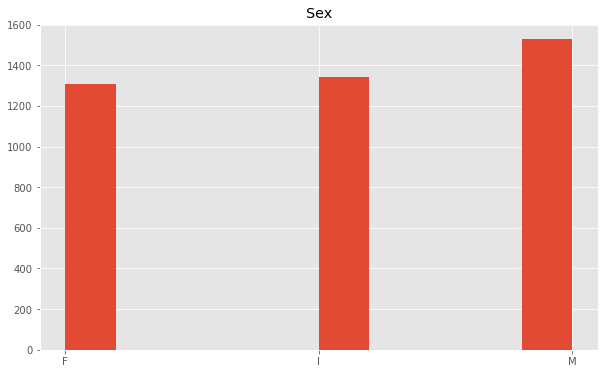

<Figure size 432x288 with 0 Axes>

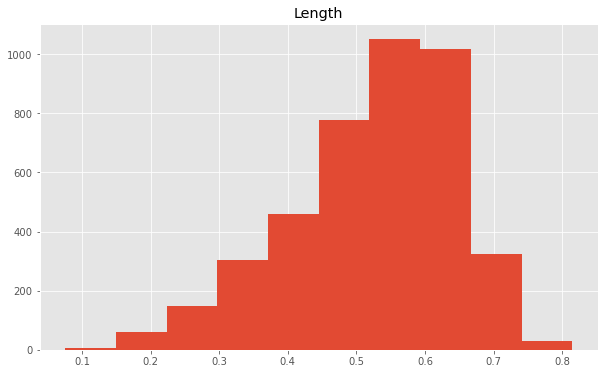

<Figure size 432x288 with 0 Axes>

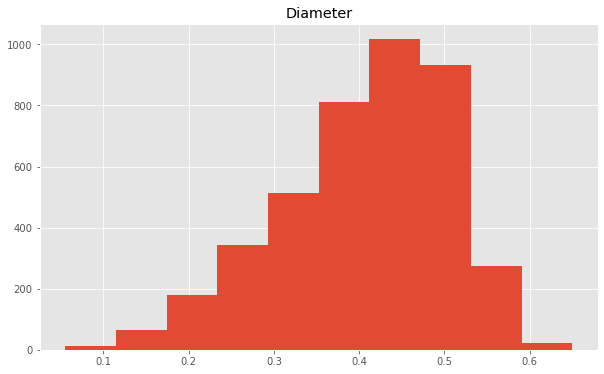

<Figure size 432x288 with 0 Axes>

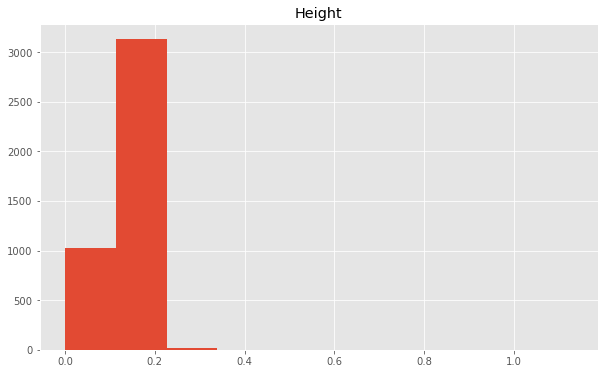

<Figure size 432x288 with 0 Axes>

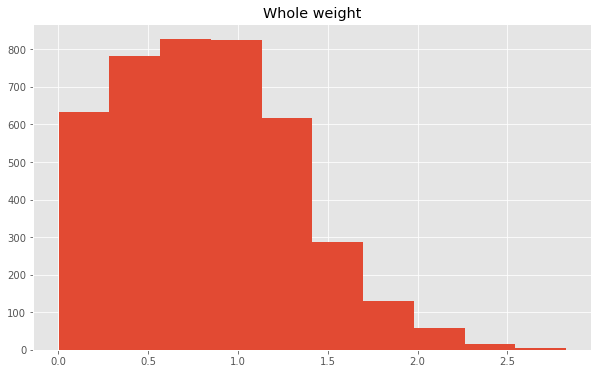

<Figure size 432x288 with 0 Axes>

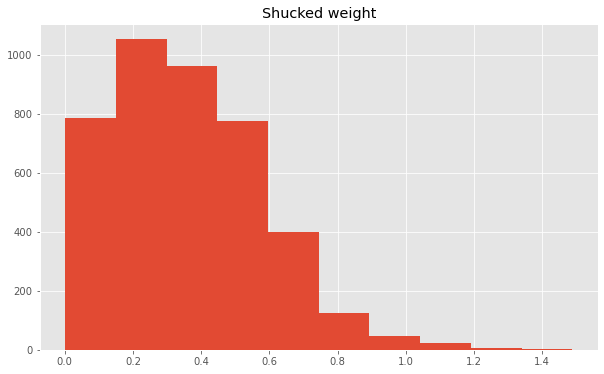

<Figure size 432x288 with 0 Axes>

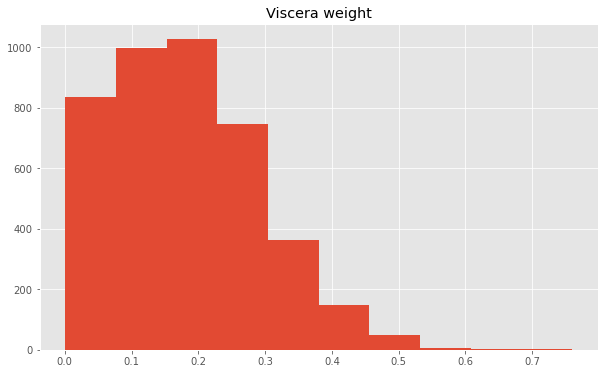

<Figure size 432x288 with 0 Axes>

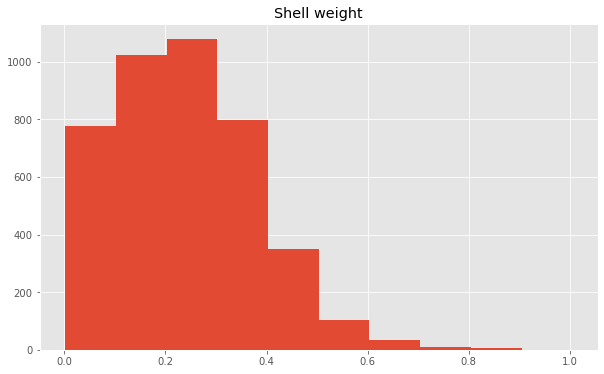

<Figure size 432x288 with 0 Axes>

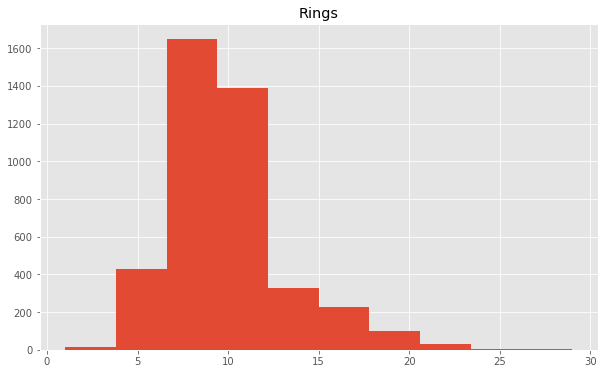

<Figure size 432x288 with 0 Axes>

In [3]:
#Load the necessary python libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('abalone.data',sep=',',header=None)
df.columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df.head(5)
df_test=df['Rings']
l=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
for i in range(0,9):
    plt.figure(figsize=(10.0,6.0))
    plt.title(label=l[i])
    plt.hist(sorted(df.iloc[:,i]))
    plt.show()
    plt.clf()

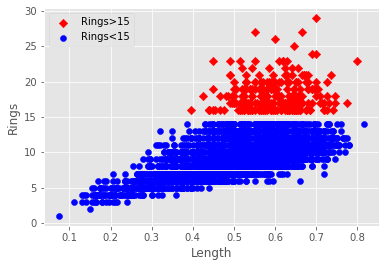

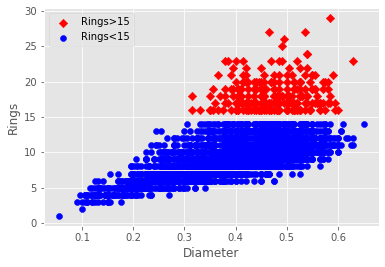

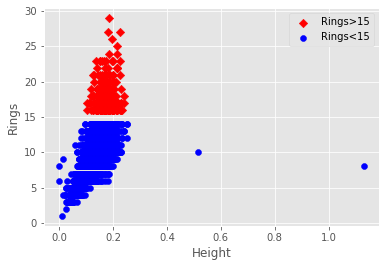

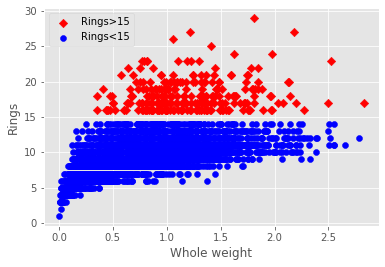

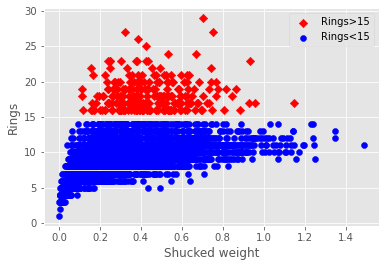

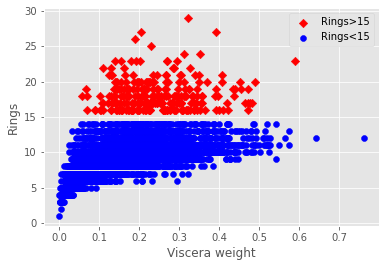

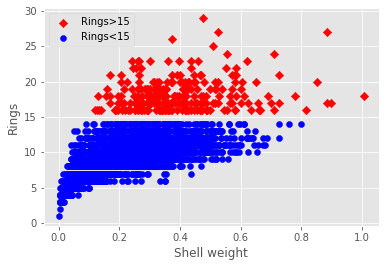

In [4]:
for i in range(1,8):
    plt.scatter(df[l[i]][df.Rings>15].array,
                df['Rings'][df.Rings>15].array,
               marker='D',
               color='red',
               label='Rings>15'
            )

    plt.scatter(df[l[i]][df.Rings<15].array,
                df['Rings'][df.Rings<15].array,
               marker='o',
               color='blue',
               label='Rings<15'
            )
    plt.xlabel(l[i])
    plt.ylabel('Rings')
    plt.legend()
    plt.show()

Through the characteristic scatter diagram, we can find that the size of rings has a linear relationship with each characteristic attribute, in which the length and diameter are obvious. When the length is less than 0.4 or the diameter is less than 0.3, there are almost no rings greater than 15.

In [12]:
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture

for i in range(0,df['Sex'].size):
    if df['Sex'][i]=='I':
        df.loc[i,'Sex']=0
    elif df['Sex'][i]=='M' :
        df.loc[i,'Sex']=1
    else:
        df.loc[i,'Sex']=2
import numpy as np
from sklearn.model_selection import train_test_split
X = df.drop('Rings',axis=1).values
y = df['Rings'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
lm=GaussianMixture(n_components=30,random_state=42)
lm.fit(X_train, y_train)



train_pred = lm.predict(X_train)
test_pred  = lm.predict(X_test)
print(classification_report(y_test, test_pred))
print("train data mean square error:%.2f" % np.mean((train_pred-y_train)**2))

print("test data mean square error:%.2f" % np.mean((test_pred-y_test)**2))

print("predict score:%.2f" % lm.score(X_test, y_test))

[16 13 16 ... 13 17  6]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        59
           6       0.00      0.00      0.00       101
           7       0.00      0.00      0.00       177
           8       0.00      0.00      0.00       214
           9       0.00      0.00      0.00       281
          10       0.00      0.00      0.00       257
          11       0.05      0.02      0.02       189
          12       0.06      0.02      0.03       109
          13       0.02      0.03      0.02        75
          14       0.17      0.02      0.04        48
          15       0.00      0.00      0.00        41
          16       0.00      0.04      0.01        23
   

C:\Users\bin\anaconda3\envs\Mach_Learn\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bin\anaconda3\envs\Mach_Learn\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bin\anaconda3\envs\Mach_Learn\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bin\anaconda